### Método de Euler para Sistemas de EDO's

O método de Euler explícito pode ser estendido para aplicação em sistemas de EDO's de
primeira ordem. Considere o seguinte sistema de PVI's:

$\begin{align}
\begin{cases}
\dfrac{dx}{dt} = f(t,x,y), \quad {x(0) = x_0} \\ \\
\dfrac{dy}{dt} = f(t,x,y), \quad {y(0) = y_0} 
\end{cases}
\end{align}$

De forma semelhante ao realizado para uma única equação, pode-se partir das condições
iniciais e ir avançando ao longo de t com base nos valores já conhecidos:

$x_{n+1} = x_n + \Delta t f (t_n,x_n,y_n)$

$y_{n+1} = y_n +  \Delta t g(t_n,x_n,y_n)$

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

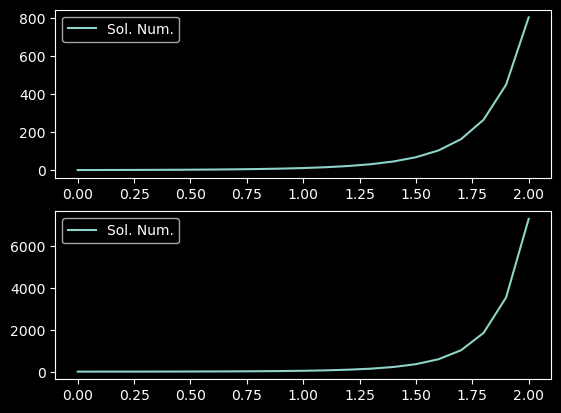

In [75]:
# dxdt = y  com  x(0) = 0
# dydx = x sqrt(y) + 3y com y(0) = 2
# Dt = 0.1

f = lambda t,x,y: y
g = lambda t,x,y: x*(y)**(1/2) + 3*y

Dt = 0.1   # Tamanho do passo
N = 21     # Número de pontos
x = np.zeros(N) # array com N entradas zeros
y = np.zeros(N) # array com N entradas zeros
t = np.linspace(0,Dt*(N-1),N) # array com N entradas igualmente espaçados com 0.1
x[0] = 0
y[0] = 2  # elemento de y na entrada y0 = -1
#t[0] = 0   # elemento de t na entrada t0 = 0

# Método de Euler
for i in range(N - 1):
    x[i + 1] = x[i] + Dt*f(t[i],x[i],y[i])
    y[i + 1] = y[i] + Dt*g(t[i],x[i],y[i])

plt.style.use("dark_background")
fig,ax = plt.subplots(2,1)
ax[0].plot(t,x, label="Sol. Num.")
ax[0].legend()
ax[1].plot(t,y, label="Sol. Num.")
ax[1].legend()

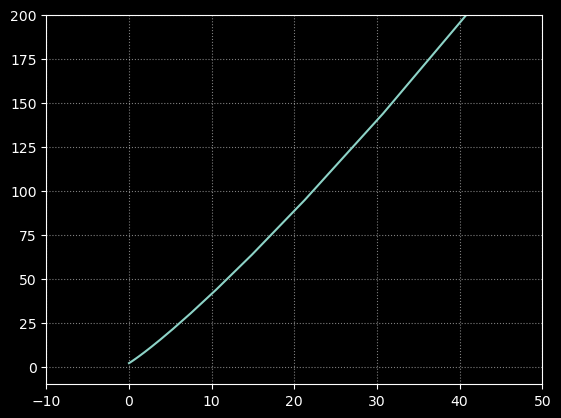

In [76]:
plt.plot(x.T,y.T)
plt.xlim(-10,50)
plt.ylim(-10,200)
plt.grid(linestyle=":",alpha=0.5)

In [77]:
# dxdt = y  com  x(0) = 0
# dydt = x sqrt(y) + 3y com y(0) = 2


In [78]:
def System(t,z):
    x,y = z
    dxdt = y
    dydt = x*(y)**(1/2) + 3*y
    return [dxdt,dydt]

In [79]:
w0 = [0,2]
t_eval = np.linspace(0,1,55)

In [80]:
sol = solve_ivp(System,(0,1),w0,t_eval=t_eval)

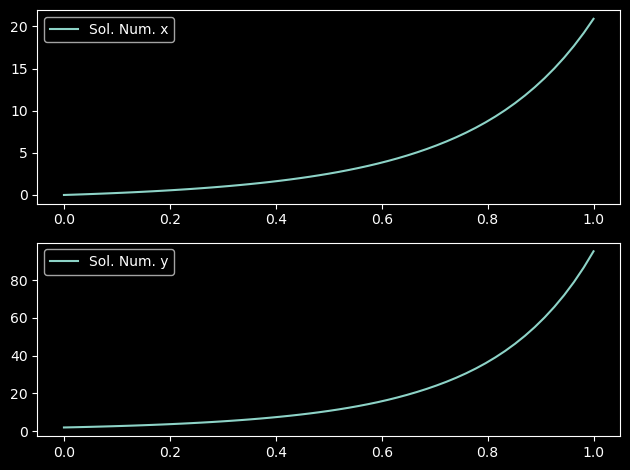

In [81]:
plt.style.use("dark_background")
fig,ax = plt.subplots(2,1)
ax[0].plot(sol.t,sol.y[0], label="Sol. Num. x")
ax[0].legend()
ax[1].plot(sol.t,sol.y[1], label="Sol. Num. y")
ax[1].legend()

plt.tight_layout()

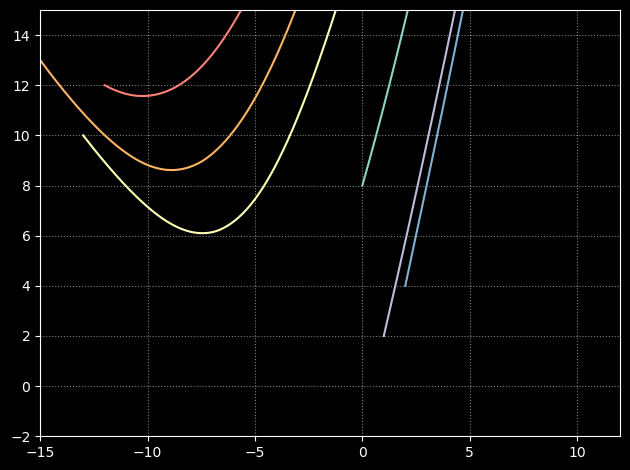

In [82]:
t_eval = np.linspace(-1,1,1000)
sol1 = [solve_ivp(System,(-1,1),v0,t_eval=t_eval) for v0 in [(0,8),(1,2),(2,4)]]
sol2 = [solve_ivp(System,(-1,1),v0,t_eval=t_eval) for v0 in [(-13,10),(-12,12),(-15,13)]]

for i in range(len(sol2)):
    plt.plot(sol1[i].y.T[:,0],sol1[i].y.T[:,1])
    plt.plot(sol2[i].y.T[:,0],sol2[i].y.T[:,1])
plt.xlim(-15,12)
plt.ylim(-2,15)
plt.grid(linestyle=":",alpha=0.5)
plt.tight_layout()

In [83]:
# dxdt = y  com  x(0) = 0
# dydx = x sqrt(y) + 3y com y(0) = 2

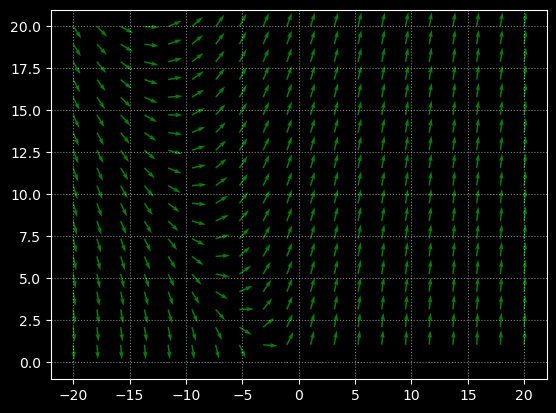

In [84]:
x,y = np.linspace(-20,20,20),np.linspace(0,20,20)
X,Y = np.meshgrid(x,y)

dx = Y
dy = X*(Y)**(0.5) + 3*Y

M = (dx**2 + dy**2)**(0.5) + 1e-100

DX = dx/M
DY = dy/M

plt.quiver(X,Y,DX,DY, color="green")
plt.grid(linestyle=":",alpha=0.5)